In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [43]:
df = pd.read_csv('Mobile_data.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [44]:
df.shape

(2000, 15)

In [45]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [46]:
df.duplicated().sum()

0

#### Check categories in target variable

In [47]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [48]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [49]:
for i in df.columns:
    print(f'Feature {i} | Unique_Values {df[i].nunique()}')

Feature battery_power | Unique_Values 1094
Feature clock_speed | Unique_Values 26
Feature fc | Unique_Values 20
Feature int_memory | Unique_Values 63
Feature m_dep | Unique_Values 10
Feature mobile_wt | Unique_Values 121
Feature n_cores | Unique_Values 8
Feature pc | Unique_Values 21
Feature px_height | Unique_Values 1137
Feature px_width | Unique_Values 1109
Feature ram | Unique_Values 1562
Feature sc_h | Unique_Values 15
Feature sc_w | Unique_Values 19
Feature talk_time | Unique_Values 19
Feature price_range | Unique_Values 4


In [50]:
cont_cols = ['battery_power','clock_speed','fc','int_memory','mobile_wt',
             'px_height','px_width','ram','sc_h','sc_w','talk_time','pc']
cat_cols = ['m_dep','n_cores','price_range']

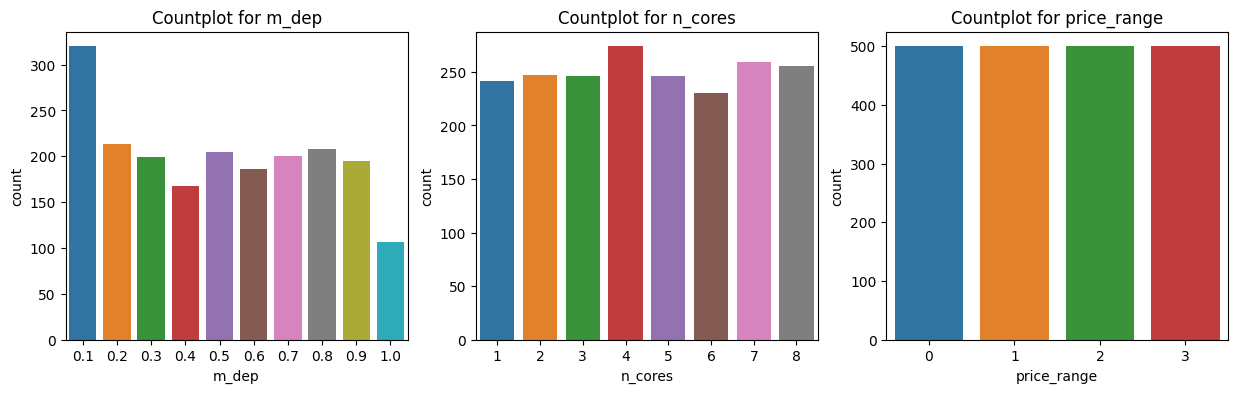

In [51]:
plt.figure(figsize=(15,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

In [52]:
len(cont_cols)

12

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [54]:
print(df[(df['pc']==0) & (df['fc']==0)].shape)
df[(df['pc']==0) & (df['fc']==0)].head(10)
# Infernece  => Non smart phones

(101, 15)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
7,1954,0.5,0,24,0.8,187,4,0,512,1149,700,16,3,5,0
33,1310,2.2,0,51,0.6,100,4,0,178,1919,3845,7,0,12,3
52,1654,1.5,0,43,0.3,109,2,0,546,629,3112,12,5,10,3
54,1073,0.5,0,51,0.5,145,7,0,690,804,2908,6,0,18,2
62,1156,1.2,0,50,0.8,159,2,0,322,547,470,7,0,15,0
67,1866,1.4,0,30,0.5,182,3,0,108,1781,3834,16,11,8,3
92,885,2.3,0,15,0.4,103,7,0,769,802,1410,16,10,5,0
116,909,1.4,0,53,0.3,82,8,0,635,973,3187,12,9,4,2
119,1778,0.5,0,15,0.5,102,3,0,1445,1954,1214,5,0,14,1
135,1213,0.5,0,16,0.5,108,5,0,226,1248,2700,12,3,9,2


In [55]:
print(df[df['px_height']==0].shape)
print(df[df['sc_w']==0].shape)

(2, 15)
(180, 15)


In [56]:
df['sc_w'].replace(0,df['sc_w'].median(),inplace=True)
df['px_height'].replace(0,df['px_height'].median(),inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.67200,443.318507,1.0,284.00,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


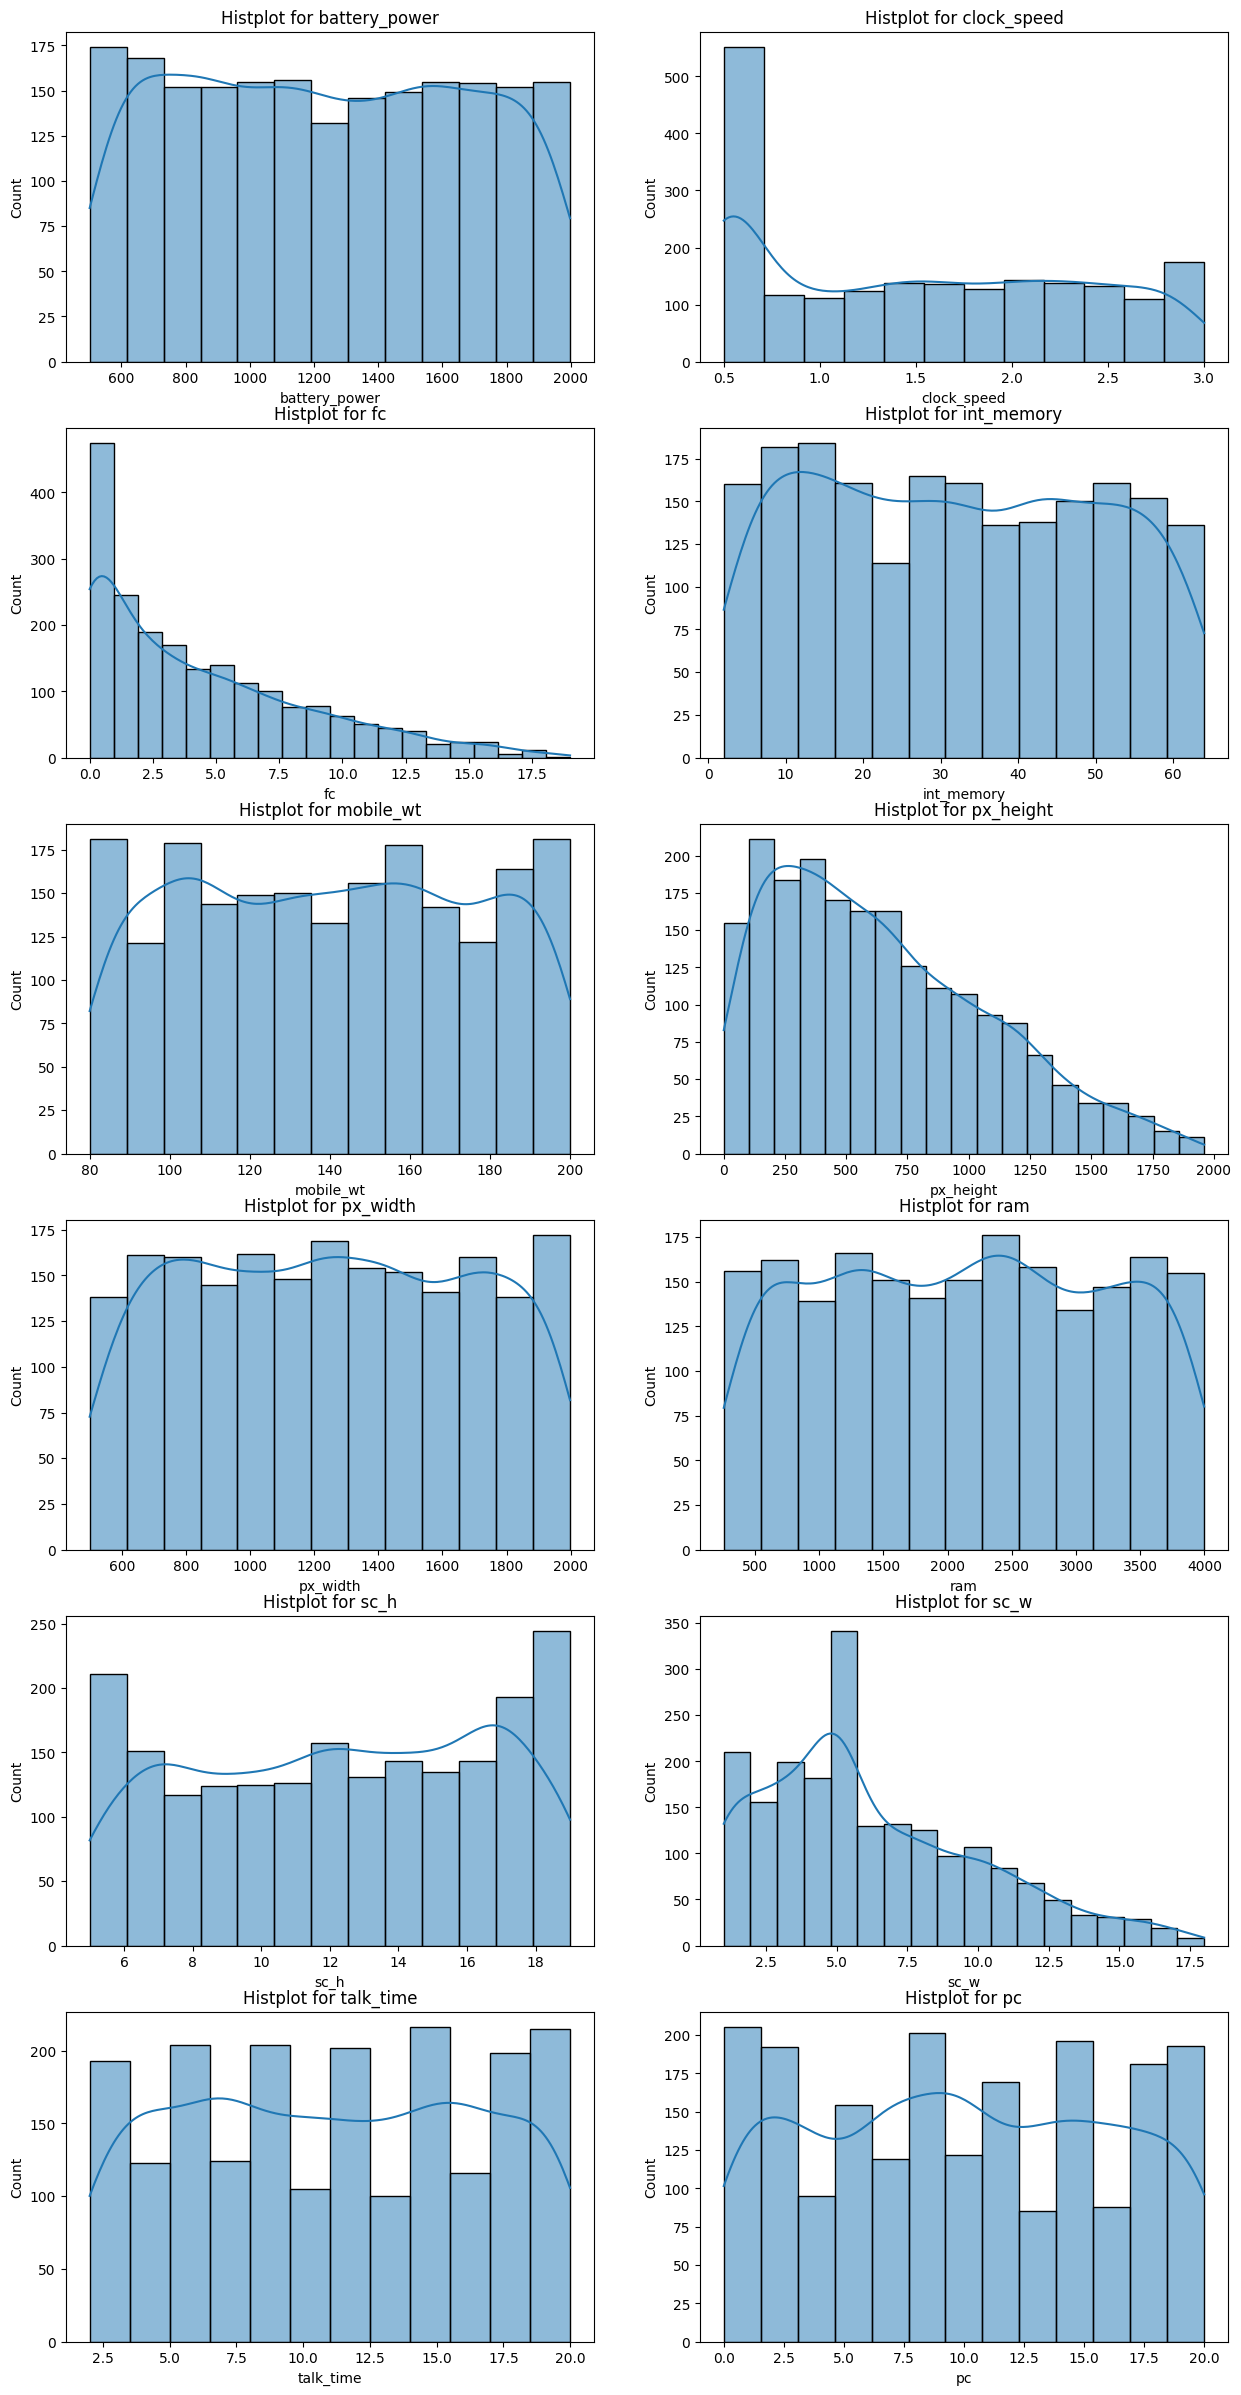

In [57]:
plt.figure(figsize=(15,30))
for i in range(len(cont_cols)):
    plt.subplot(6,2,i+1)
    sns.histplot(x=df[cont_cols[i]],kde=True)
    plt.title(f'Histplot for {cont_cols[i]}')
plt.show()

#### Correlation

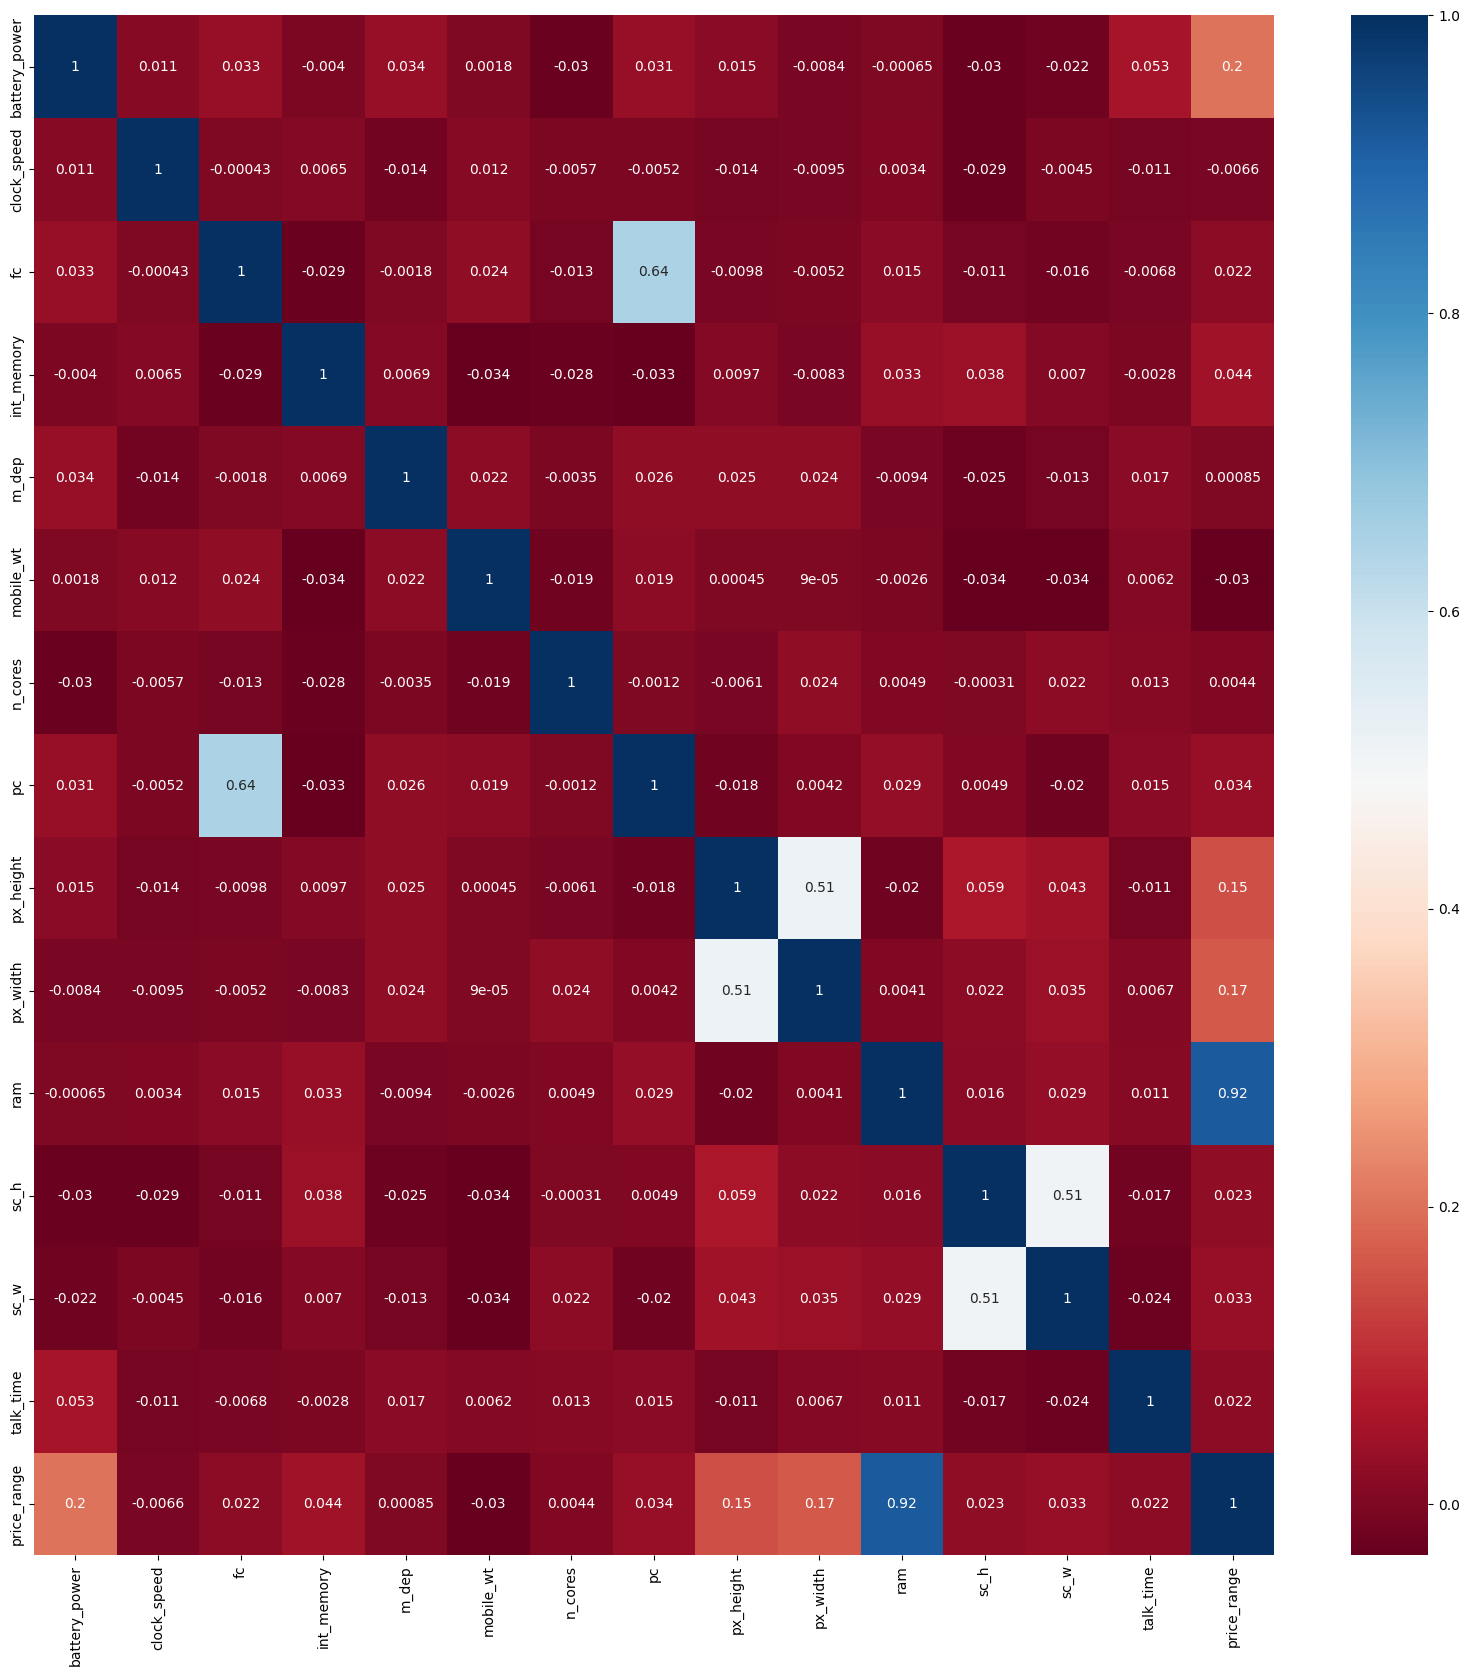

In [58]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

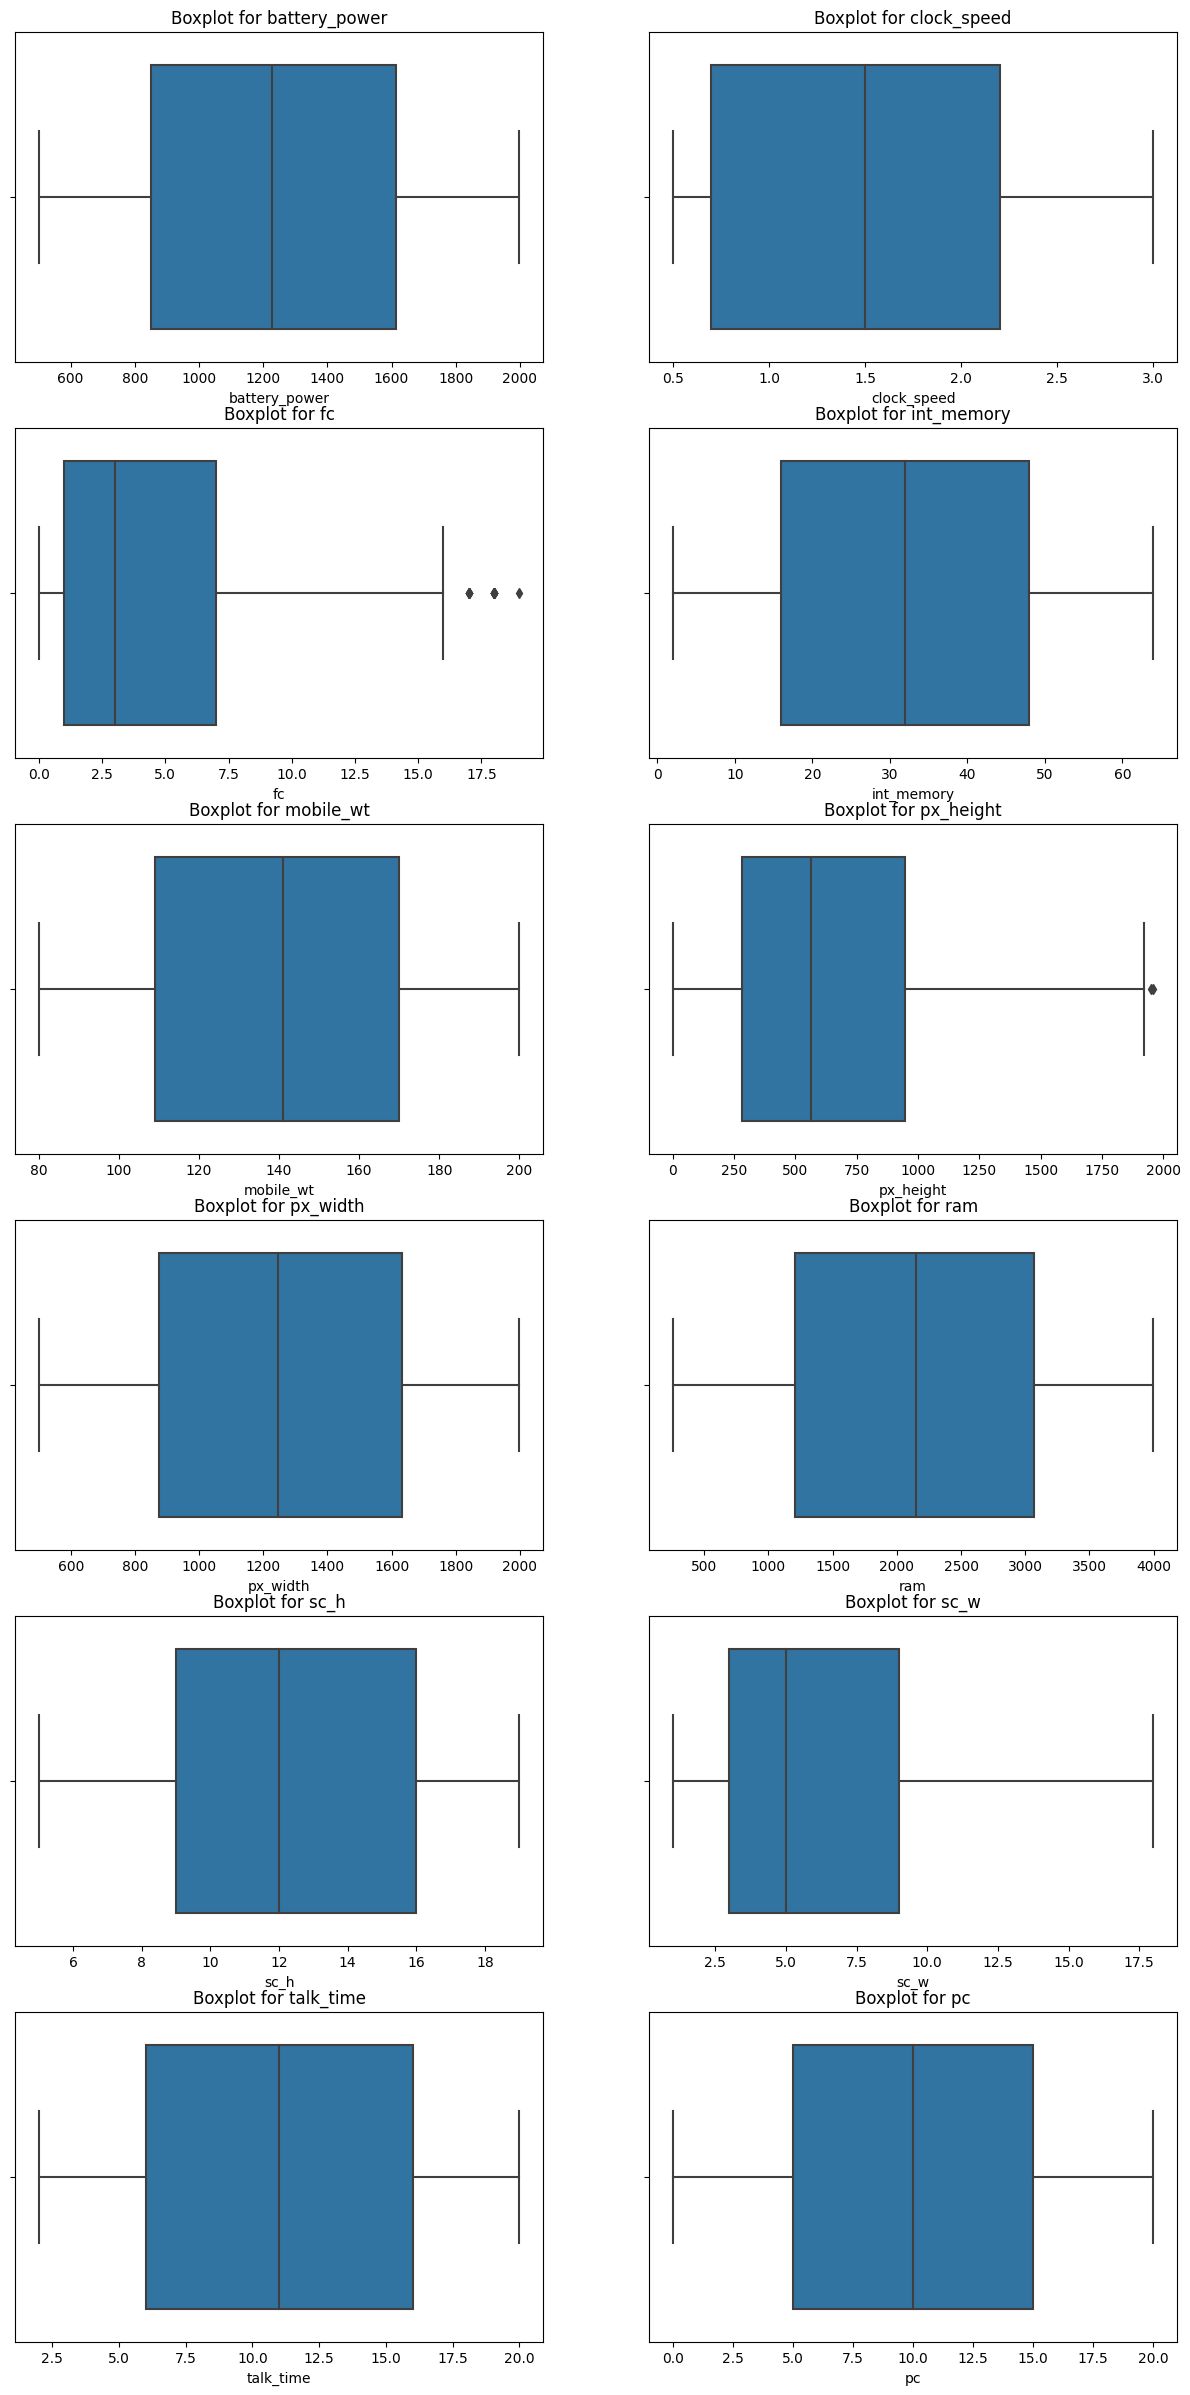

In [59]:
plt.figure(figsize=(15,30))
for i in range(len(cont_cols)):
    plt.subplot(6,2,i+1)
    sns.boxplot(x=df[cont_cols[i]])
    plt.title(f'Boxplot for {cont_cols[i]}')
plt.show()

In [60]:
a = df[['fc','px_height']].describe(percentiles=[0.01,0.02,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,50%,98%,99%,max
fc,0.0,0.00,0.00,3.0,16.0,16.00,19.0
px_height,1.0,17.99,34.94,564.0,1698.0,1791.01,1960.0


In [61]:
df['fc'] = np.where(df['fc']>16,16,df['fc'])
df['px_height'] = np.where(df['px_height']>1791.01,1791.01,df['px_height'])

#### Select x and y

In [62]:
x = df.drop('price_range',axis=1)
y = df['price_range']
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


#### Split data into train and test

In [63]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 14)
(600, 14)
(1400,)
(600,)


In [65]:
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier

In [74]:
x_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1242.160714,1.527143,4.288571,32.122143,0.504857,141.068571,4.525000,9.902143,641.090821,1251.222857,2092.497143,12.309286,6.179286,11.016429
std,441.087307,0.817906,4.268291,18.247526,0.285693,35.358265,2.293529,6.022806,443.391075,438.434388,1090.725398,4.221958,3.961754,5.456346
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,263.000000,5.000000,1.000000,2.000000
25%,854.000000,0.700000,1.000000,16.000000,0.200000,110.000000,3.000000,5.000000,276.750000,872.750000,1151.500000,9.000000,3.000000,6.000000
50%,1237.000000,1.500000,3.000000,32.000000,0.500000,141.000000,5.000000,10.000000,553.000000,1247.000000,2101.500000,12.000000,5.000000,11.000000
75%,1620.750000,2.200000,7.000000,48.000000,0.800000,172.000000,7.000000,15.000000,951.250000,1645.500000,3054.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,16.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1791.010000,1998.000000,3998.000000,19.000000,18.000000,20.000000


#### Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
# Mean = 0, Std = 1 => to bring data to similar range

In [77]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

In [78]:
x_train[cont_cols].head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,pc
710,663,0.8,0,25,183,82.0,1605,3176,6,2,2,1
917,904,1.8,3,35,168,42.0,507,1360,15,12,11,4
743,1159,2.8,5,18,83,681.0,723,2246,8,1,3,7
1303,888,2.6,2,33,198,327.0,1683,3407,12,1,20,17
1978,1483,2.2,3,53,169,291.0,651,1744,6,3,10,11


In [79]:
sc = StandardScaler()

x_train[cont_cols] = sc.fit_transform(x_train[cont_cols])
x_test[cont_cols] = sc.transform(x_test[cont_cols])

In [93]:
x_train1.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
710,663,0.8,0,25,0.6,183,2,1,82.0,1605,3176,6,2,2
917,904,1.8,3,35,0.4,168,3,4,42.0,507,1360,15,12,11
743,1159,2.8,5,18,0.5,83,1,7,681.0,723,2246,8,1,3
1303,888,2.6,2,33,0.4,198,2,17,327.0,1683,3407,12,1,20
1978,1483,2.2,3,53,0.7,169,5,11,291.0,651,1744,6,3,10


#### Model Building

In [98]:
knn1 = KNeighborsClassifier(n_neighbors=17)
knn1.fit(x_train1,y_train)  # Non-Scaled data

KNeighborsClassifier(n_neighbors=17)

In [99]:
print('Train_Score',knn1.score(x_train1,y_train))
print('Test_Score',knn1.score(x_test1,y_test))

Train_Score 0.9507142857142857
Test_Score 0.9216666666666666


#### Determine optimnal number for K

In [107]:
test_acc_list = []
for i in range(3,49,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train1,y_train)  # non-scaled train data
    test_acc = model.score(x_test1,y_test) # non-scaled test data
    test_acc_list.append(test_acc)

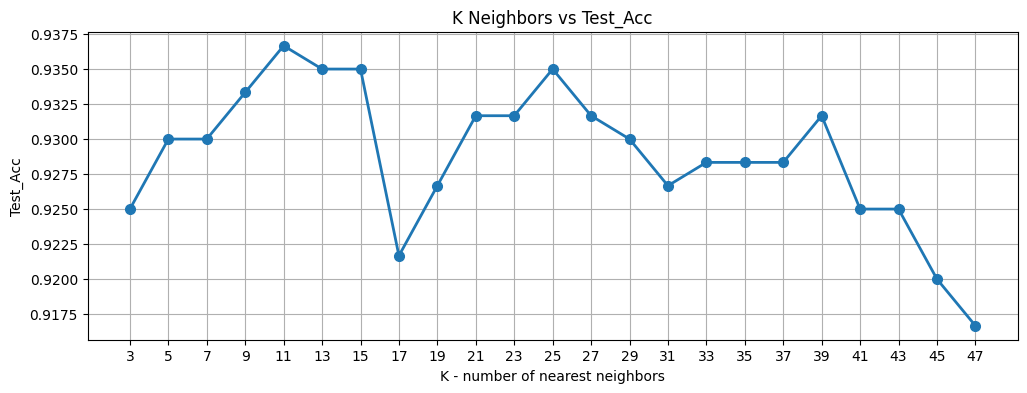

In [108]:
plt.figure(figsize=(12,4))
plt.plot(list(range(3,49,2)),test_acc_list,marker='o',lw=2,markersize=7)
plt.xlabel('K - number of nearest neighbors')
plt.ylabel('Test_Acc')
plt.title('K Neighbors vs Test_Acc')
plt.xticks(list(range(3,49,2)))
plt.grid()
plt.show()

#### Infernce => K= 11

In [109]:
knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(x_train1,y_train)  # Non-Scaled data

KNeighborsClassifier(n_neighbors=11)

In [ ]:
print('Train_Score',knn2.score(x_train1,y_train))
print('Test_Score',knn2.score(x_test1,y_test))